## Tools

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style("darkgrid")

## Dataset

In [2]:
data = pd.read_csv("data.csv")

#Sekedar memakai library pandas untuk membuka file .csv
for i in range (len (data)):
    if data.loc[i, "diagnosis"] == 'M':
        data.loc[i, "diagnosis"] = 1
    else:
        data.loc[i, "diagnosis"] = 0
#Loop diatas untuk mengganti
# Nilai pada attribute diagnosis dari M diganti 1
# alasannya sekedar supaya lebih mudah dealing dengan 1 dan 0 daripada M dan B,
# dan juga lebih membantu dalam readability. 1 artinya Malignant (ganas) 0 artinya Benign (jinak)
# Maksud dari data.loc adalah lokasi data pada row ke i dan column diagnosis.#
data.head(30)
#Printing 30 data pertama.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


## Basic EDA

Benign = 357
Malign = 212


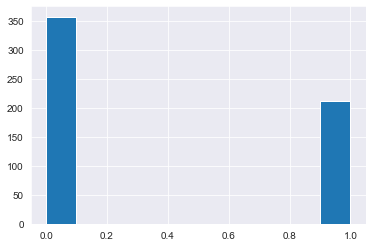

In [3]:
data["diagnosis"].hist()
numOfMalign = 0
numOfBenign = 0
for i in range (len (data)):
    if data.loc[i, "diagnosis"] == 1:
        numOfMalign += 1
    else:
        numOfBenign += 1
print("Benign = "+ str(numOfBenign))
print("Malign = " + str(numOfMalign))

#Sekedar menghitung jumlah malignant dan benign berdasarkan nilai 1 dan 0 yang ada pada column diagnosis


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


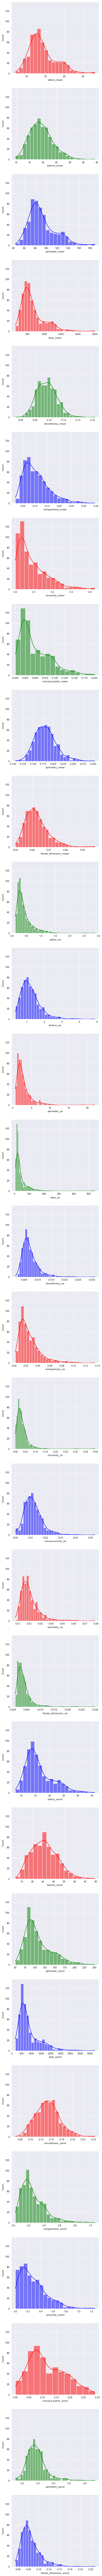

In [4]:
fig, axes = plt.subplots(30, 1, figsize=(6, 180), sharey=True)
"""sns.histplot(data, ax=axes[0], x="radius_mean", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="texture_mean", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="smoothness_mean", kde=True)"""
lab = list(data.columns[2:])
print(lab)
color1 = ['r','g','b']
for i in range(len(lab)):
    sns.histplot(data, ax = axes[i], x = lab[i], kde = True, color = color1[i%3])


## Formula for Bayes' Theorem

Ini formula teori Bayes yang kita ketahui. Tapi disini kita hanya akan menghitung pembilang, (tidak menghiraukan evidence), karena yang kita inginkan adalah Likelihood antara A dan B, karena jika kita include kan penyebut evidence P(B), maka persamaan di kanan akan menjadi sebuah "Probability", dan bukan sebuah "Likelihood". Kita tertarik dengan likelihood karena logically, jika kita ada 2 probability dari 2 data point, tentu kita tahu denominator (penyebutnya) itu pasti sama, jadi, tidak menghiraukan penyebutnya tidak memiliki konsekuensi, selama kita tahu perbandingan antara numerator (penyebutnya), kita bisa menyimpulkan informasi mana yang lebih signifikan. 
Contohnya,
misal kita ada 4/3 dan 5/3, kita tahu jika 5/3 > 4/3, kenapa? tentu karena jikapun kita nggak memakai numeratornya, hasilnya tetap sama saja, 5 > 4. Inilah mengapa kita tidak apa apa untuk tidak menghiraukan denominatornya. Dan selain itu, meng-ignore denominatornya juga meringankan beban komputasi ketika menghitung melalui ratusan data.

![Bayesian](bayesian.jpg)

## The Formula for Gauss Distribution Function

Ini juga diketahui sbg Probability Density Function. Perhitungan ini akan berada di tempat dimana formula untuk Likelihood ditempatkan. Kenapa kita memakai gaussian distribution di tempat likelihood untuk Naive Bayes?
1. Karena tentu lebih mudah untuk dikerjakan karena kita hanya perlu menghitung mean dan standar deviasi dari data yang ada, daripada kita harus menghitung probability dari B given A, tapi yang kedua
2. Data yang kita miliki sudah tampak relatif ter distribusi normal (rujuk grafik di bagian atas)

![Formula](gauss_dist.jpg)

## Calculating Prior Probability

In [5]:
#Fungsi untuk menghitung prior probability dengan masukan df(data point) dan Y(diagnosis)
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    #Classes isinya dalah list dari df[Y] yang unik, yaitu 0 dan 1
    prior = [len(df[df[Y]==i])/len(df) for i in classes]
    #Disini perhitungan prior probability.
    return prior

## Calculate Likelihood using Gaussian distribution.

In [6]:
#Fungsi menghitung distribusi gaussian.
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    #df akan berisi df[dataset dimana df[Y] bernilai 0 atau 1]
    #Jadi maksudnya, df akan berisikan semua data dimana df[Y] adalah 0 untuk iterasi pertama
    #Dan selanjutnya df akan berisikan semua data dimana df[Y] adalah 1 untuk interasi selanjutnya
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std**2)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    #Fungsi perhitungan utama, rujuk rumus diatas
    return p_x_given_y

## Logika utama untuk Gaussian Naive Bayes Classifier

In [7]:
def naive_bayes_gaussian(df, X, Y):
    # Features adalah semua column nomor 2 kekanan
    features = list(df.columns)[2:]

    # Panggil fungsi prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # Array kosong untuk menyimpan hasil perhtiugnan
    for x in X:
        # Kita iterasi untuk semua data sepanjang Xtest
        labels = sorted(list(df[Y].unique()))
        likelihood = [1 for i in range(len(labels))]
        #List comprehension
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
        # calculate posterior probability (numerator only)
        post_prob = [likelihood[j] * prior[j] for j in range(len(labels))]
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Splitting the DataFrame into Test and Train

In [8]:
def TrainTestSplit(df, test_size):
    testSampleSize = len(df) * test_size
    if (testSampleSize - int(testSampleSize)) >= 0.5:
        testSampleSize =  int(testSampleSize) + 1
    else:
        testSampleSize = int(testSampleSize)
    indices = []
    trainArr = []
    testArr = []
    count = 0
    for i in range(testSampleSize):
        y = random.randint(0, len(df))
        while y in indices:
            y = random.randint(0, len(df))
        indices.append(y)
        count += 1
    
    for i in indices:
        testArr.append(df.iloc[i:i+1])
    for i in range(len(df)):
        if i not in indices:
            trainArr.append(df.iloc[i:i+1])
    return pd.concat(trainArr).sort_index(ascending = True), pd.concat(testArr).sort_index(ascending = True)

## Making the Confusion Matrix

In [9]:
def ConfusionMatrix (yTest, yPred):
    matrix = np.array([[0,0], [0,0]])
    for i in range (len(yTest)):
        if yPred[i] == 1:
            if yTest[i] == 1:
                matrix[0][0] += 1
            else:
                matrix [0][1] += 1
        else:
            if yTest[i] == 1:
                matrix[1][0] += 1
            else:
                matrix [1][1] += 1
    return matrix

# Explanation for confusion matrix
# Matrixnya adalah 
# [[TP, FP],
#  [FN, TN]]
# Logikanya adalah, untuk sepanjang yTest (sbenernya sama saja kalo makai yPrediction, karena jumlah mereka sama
# ini karena logically, yTest adalah hasil sesungguhnya (yg asli), sementara yPred adalah hasil ketika 
# masukannya adalah xtest (yang artinya sama aja seperti ytest)  )
# jika nilai yPrediction adalah 1 , dan di nilai i yang sama, yTest juga 1 (sama sama Benign)
# PADA matrix index [0][0] akan ditambah 1, karena disitulah nilai True Positive (TP) yang berarti diagnosis Benign
# pada prediction sesuai dengan diagnosis pada test
# dan sebaliknya, jika nilai yPrediction adalah 0, dan pada i yang sama yTest juga 0 (sama sama Malignant)
# maka pada index [1][1] akan ditambah 1 karena disitu nilai True Negative, artinya diagnosis malignant sesuai.
# Perlu diperhatikan ini dilakukan untuk sepanjang yTest, yang berarti berlaku untuk semua nilai y, artinya, 
# kalo kita jumlahkan jumlah nilai pada tiap index, hasilnya adalah jumlah y itu sendiri. #



## Conducting an F1 Accuracy Test

In [10]:
def f1 (confusionMatrix):
    tp = confusionMatrix [0][0]
    fp = confusionMatrix[0][1]
    fn = confusionMatrix [1][0]

    precision = tp / (tp + fp)
    #Seberapa akurat data kita
    recall = tp / (tp + fn)
    return 2 * (precision * recall )/ (precision + recall)

## Test Gaussian model

Disini kita bandingkan dengan hasil dari sklearn

In [11]:
train, test = TrainTestSplit(data, test_size= 0.2)

X_test = test.iloc[:,2:].values
Y_test = test.iloc[:,1].values

Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

cm = ConfusionMatrix(Y_test, Y_pred)
print("The confusion matrix is : \n{}".format(cm))
print("The accuracy is : {}" .format(f1(cm)))
print("The actual diagnosis is \n{} \nThe Predicted diagnosis based on the ML model is \n{}\nWhere 0 is benign and 1 is Malignant".format(Y_test, Y_pred))

The confusion matrix is : 
[[39  0]
 [ 7 68]]
The accuracy is : 0.9176470588235294
The actual diagnosis is 
[1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0] 
The Predicted diagnosis based on the ML model is 
[1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0]
Where 0 is benign and 1 is Malignant
